In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # makes plots look nicer

In [5]:
import pandas as pd
news_df = pd.read_csv('../data/news_data.csv' , parse_dates=['date']) # For Reading data from
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Measures size of headlines

In [4]:
import pandas as pd

news_df = pd.read_csv('../data/news_data.csv' , parse_dates=['date']) # For Reading data from

# Count characters in each headline
news_df['headline_length'] = news_df['headline'].apply(len)

# View first 5 rows to check
news_df[['headline', 'headline_length']].head()


,headline,headline_length
0,Stocks That Hit 52-Week Highs On Friday,39
1,Stocks That Hit 52-Week Highs On Wednesday,42
2,71 Biggest Movers From Friday,29
3,46 Stocks Moving In Friday's Mid-Day Session,44
4,B of A Securities Maintains Neutral on Agilent...,87


## Show count, mean, min, max, std

In [5]:
# Show count, mean, min, max, std
news_df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

## Publisher Analysis

In [7]:
# Count number of articles per publisher
publisher_counts = news_df['publisher'].value_counts()

# Show top 10 publishers
publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

## Visualize Publisher Data

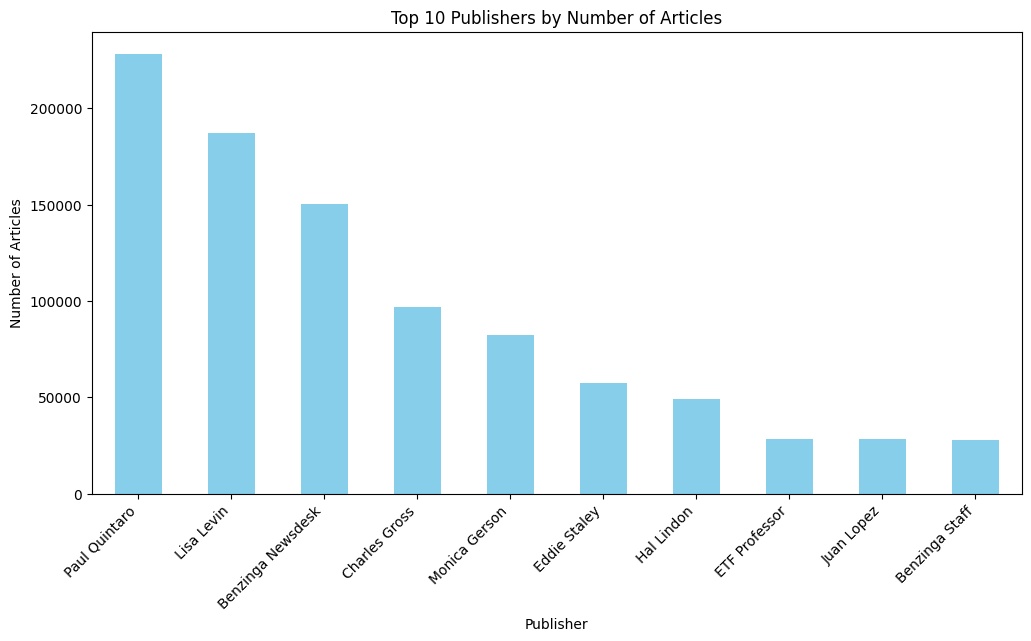

In [8]:
import matplotlib.pyplot as plt

# Take top 10 publishers
top_publishers = publisher_counts.head(10)

# Plot
plt.figure(figsize=(12,6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.show()


## Group by date and count articles per day

In [16]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')


In [19]:
daily_counts = news_df.groupby(news_df['date'].dt.date).size()

# Show first 10 days
daily_counts.head(10)


date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
2011-05-03    3
2011-05-05    3
2011-05-06    3
2011-05-07    2
dtype: int64

## Plot Daily Article Counts

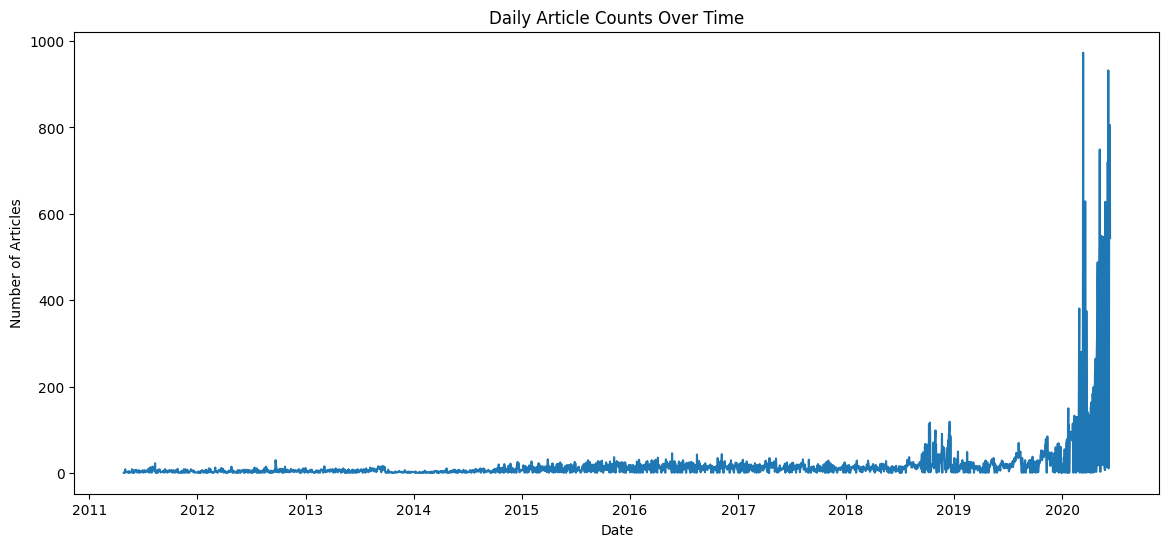

In [20]:
plt.figure(figsize=(14,6))
daily_counts.plot()
plt.title("Daily Article Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

## what time of day most articles are published.

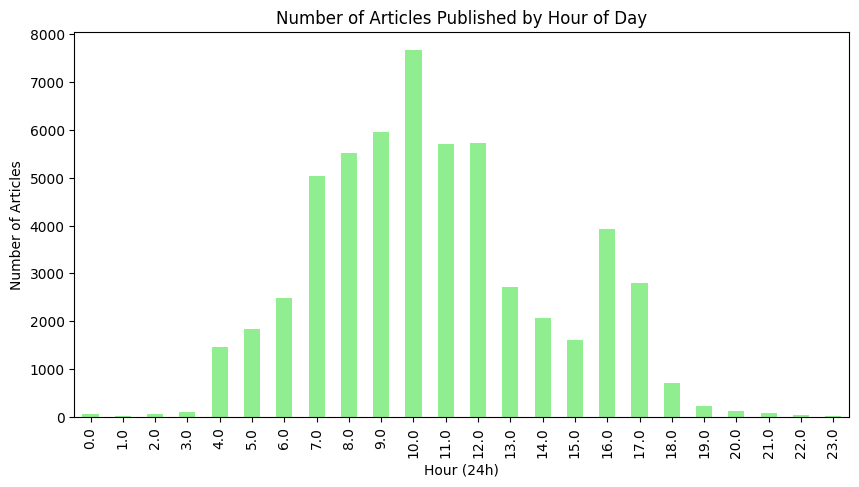

In [21]:
# Extract hour from date
news_df['hour'] = news_df['date'].dt.hour

# Count articles per hour
hourly_counts = news_df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='lightgreen')
plt.title("Number of Articles Published by Hour of Day")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Articles")
plt.show()
